# Regularization methods

## Ridge regression vs linear regression

In [1]:
import numpy as np
from sklearn.linear_model import Ridge, LassoLars, LinearRegression, Lasso
from sklearn.datasets import make_regression
from math import exp
from IPython.html.widgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

/Users/michielstock/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
X = np.vander(np.random.rand(20)*20-10, 10)
w = np.zeros((10, 1))
w[-1,:] = -2
w[-2,:] = -1.66
w[-3,:] = 0.75
w[-4,:] = 0.25
y = np.dot(X, w) + np.random.randn(20, 1)*20

In [3]:
def tune_ridge(log_reg_value):
    reg_value = exp(log_reg_value)
    fig, ax = plt.subplots(figsize=(10, 10))
    # shows effect of regularization on ridge regression
    ax.scatter(X[:, -2], y, label='data')
    xvals = np.vander(np.linspace(X[:, -2].min(), X[:, -2].max(), 100), 10)
    ax.plot(xvals[:, -2], xvals.dot(w), label='true')
    ridge_model = Ridge(alpha=reg_value)
    ridge_model.fit(X, y)
    yridge = ridge_model.predict(xvals)
    ax.plot(xvals[:, -2], yridge, label='ridge')
    ols_model = LinearRegression()
    ols_model.fit(X, y)
    yols = ols_model.predict(xvals)
    ax.plot(xvals[:, -2], yols, label='OLS')
    ax.legend(loc=0)

<function __main__.tune_ridge>

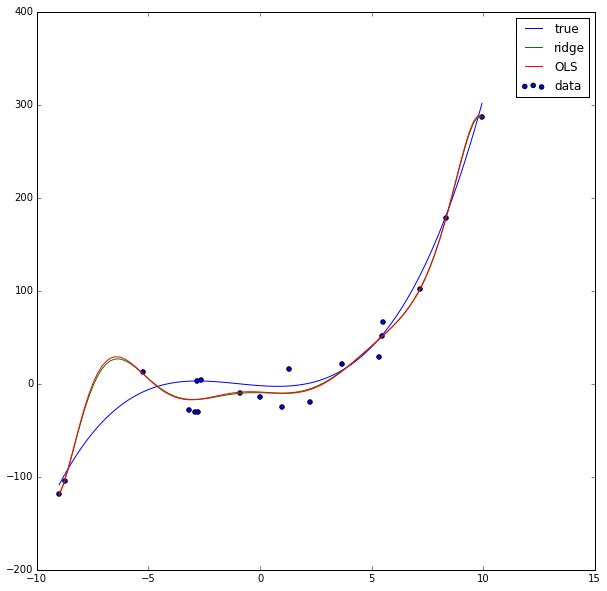

In [4]:
interact(tune_ridge, log_reg_value=(-4, 9,  0.1))

The high dimensionality and low number of observations make the ordinary least squares to overfit. Using $L_2$ regularization the ridge model can closer approximate the ground truth (but can also oversmooth).

## Comparing the weights of OLS, ridge and lasso

In [5]:
X, y, coef = make_regression(n_samples=100, coef=True, noise=10)

In [6]:
def plot_coefs(log_reg_ridge, log_reg_lasso):
    p = X.shape[1]
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(range(p), coef, ':', label='truth')
    reg_value = exp(log_reg_ridge)
    ridge_model = Ridge(alpha=reg_value)
    ridge_model.fit(X, y)
    ax.plot(range(p), ridge_model.coef_, '--', label='ridge')
    reg_value = exp(log_reg_lasso)
    ols_model = LinearRegression()
    ols_model.fit(X, y)
    ax.plot(range(p), ols_model.coef_, '-.', label='OLS')
    lasso_model = Lasso(alpha=reg_value)
    lasso_model.fit(X, y)
    ax.plot(range(p), lasso_model.coef_, '-', label='lasso')
    ax.legend(loc=0)

<function __main__.plot_coefs>

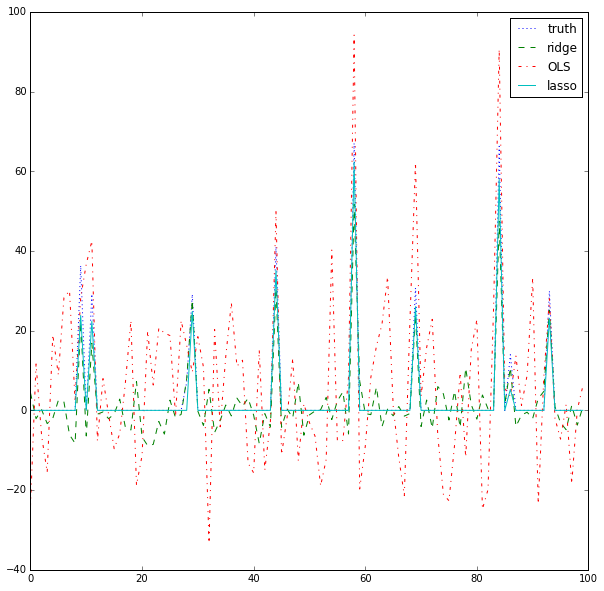

In [7]:
interact(plot_coefs, log_reg_ridge=(-4, 9,  0.1), log_reg_lasso=(-4, 9,  0.1))

100 features, with only 10 relevant:
- OLS overfits, has high values for the relevant features, but also fits parameteres for irrelevant features
- Ridge regression damps the effect for the relevant parameters, at the cost of shrinking also the value of weights corresponding to the relevant features.
- Lasso can set the weights for many irrelevant parameters to 0 while still keeping high values for relevant parameters. It is the most suited for this toy problem.

## Regularization paths of lasso and ridge

Automatically created module for IPython interactive environment


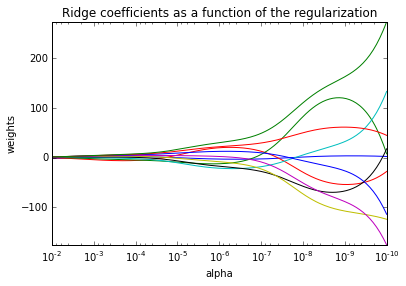

In [8]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Automatically created module for IPython interactive environment
Computing regularization path using the LARS ...
.

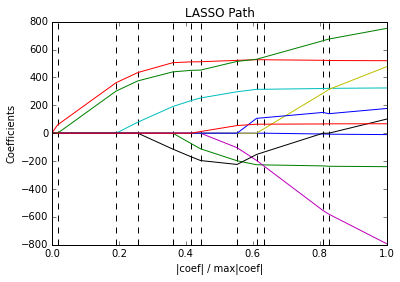

In [9]:
print(__doc__)

# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()